<a href="https://colab.research.google.com/github/Austing767/CSAwesome2/blob/main/greedylab_gatewooda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Greedy Tour: [41, 9, 23, 44, 34, 25, 3, 1, 28, 4, 47, 38, 31, 20, 46, 10, 22, 13, 24, 12, 11, 14, 32, 45, 43, 17, 6, 27, 35, 29, 5, 36, 18, 26, 42, 16, 19, 39, 8, 0, 7, 37, 30, 21, 15, 2, 33, 40, 41]
Tour Cost: 39236.88


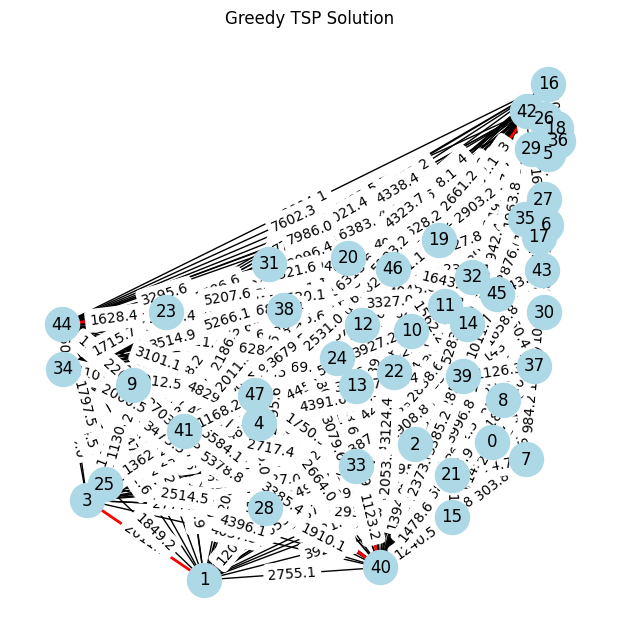

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def parse_input(filename):
    """
    Reads the contents of a file and assembles a graph.
    """
    with open(filename, 'r') as f:
        lines = f.readlines()

    n = int(lines[0].strip())
    coords = []

    for line in lines[1:n+1]:
        x, y = map(float, line.split())
        coords.append((x, y))

    G = nx.Graph()
    pos = {}

    for i, (x, y) in enumerate(coords):
        G.add_node(i, pos=(x, y))
        pos[i] = (x, y)

    for i in range(n):
        for j in range(i + 1, n):
            xi, yi = coords[i]
            xj, yj = coords[j]
            weight = math.sqrt((xi - xj) ** 2 + (yi - yj) ** 2)
            G.add_edge(i, j, weight=weight)

    return G, pos


def greedy_alg(G, start):
    """
    Greedy heuristic for TSP: Always visit the nearest unvisited neighbor.
    """
    n = len(G.nodes)
    unvisited = set(G.nodes)
    tour = [start]
    cost = 0
    current = start
    unvisited.remove(start)

    while unvisited:
        # finds nearest unvisited neighbor
        next_city, edge_data = min(
            ((neighbor, G[current][neighbor]) for neighbor in unvisited),
            key=lambda x: x[1]['weight']
        )
        cost += edge_data['weight']
        tour.append(next_city)
        current = next_city
        unvisited.remove(next_city)

    # return to start
    cost += G[current][start]['weight']
    tour.append(start)

    return tour, cost


def draw_tour(G, pos, tour, title="Greedy TSP Solution"):
    """
    Visualize the graph and highlight the greedy tour.
    """
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=600)

    # Draw edges of tour
    edge_list = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color="red", width=2)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.1f}" for k, v in labels.items()})

    plt.title(title)
    plt.show()


def main():
    G, pos = parse_input("/tsp-48.txt")

    best_tour = None
    best_cost = float("inf")

    # Try starting from each city
    for start in G.nodes:
        tour, cost = greedy_alg(G, start)
        if cost < best_cost:
            best_tour, best_cost = tour, cost

    print("Best Greedy Tour:", best_tour)
    print("Tour Cost:", round(best_cost, 2))

    draw_tour(G, pos, best_tour)


if __name__ == "__main__":
    main()
